In [17]:
import sys
import os

code_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "code"))
sys.path.append(code_dir)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs(f"../data/results/plots/merge", exist_ok=True)

In [18]:
# Load files
n = 100  # change if amount nodes has been changed
K = 15  # change if K-anonymity constrain has been changed
seed = 2025  # change if seed has been changed

filename_suffix = f"n{n}_K{K}_seed{seed}"
log_likelihood = np.load(f"../data/results/merge/log_likelihood_trace_{n}_K{K}.npy")
block_sizes = np.load(f"../data/results/merge/final_block_sizes_{n}_K{K}.npy")
with open(f"../data/results/merge/total_merge_steps_{n}_K{K}.txt", "r") as f:
    total_steps = int(f.read())

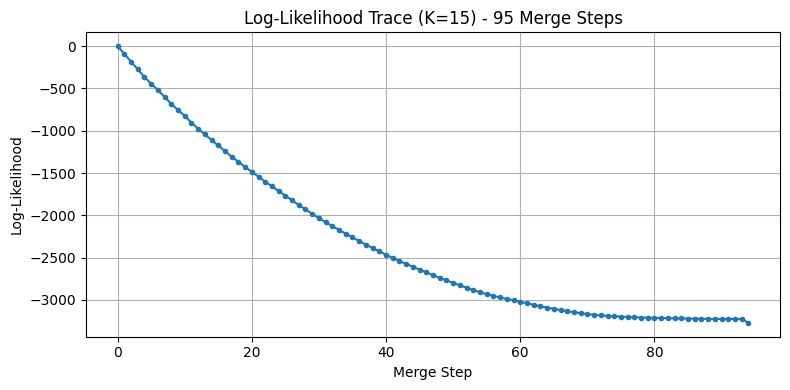

In [19]:
# Plot 1: Log-likelihood trace
plt.figure(figsize=(8, 4))
plt.plot(log_likelihood, marker="o", markersize=3)
plt.title(f"Log-Likelihood Trace (K={K}) - {total_steps} Merge Steps")
plt.xlabel("Merge Step")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.savefig(
    f"../data/results/plots/merge/log_likelihood_trace_n{n}_K{K}_seed{seed}.png",
    dpi=500,
    bbox_inches="tight",
)
plt.show()

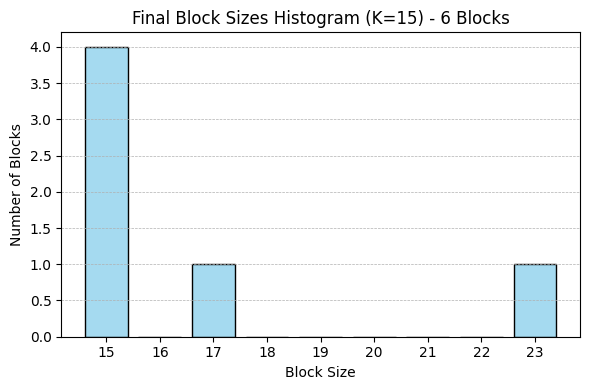

In [20]:
# Plot 2: Final block sizes
plt.figure(figsize=(6, 4))
sns.histplot(
    block_sizes,
    bins=range(min(block_sizes), max(block_sizes) + 2),  # integer bins
    discrete=True,
    shrink=0.8,
    color="skyblue",
    edgecolor="black",
)

plt.title(f"Final Block Sizes Histogram (K={K}) - {len(block_sizes)} Blocks")
plt.xlabel("Block Size")
plt.ylabel("Number of Blocks")
plt.xticks(range(min(block_sizes), max(block_sizes) + 1))  # force integer ticks
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(
    f"../data/results/plots/merge/final_block_sizes_n{n}_K{K}_seed{seed}.png",
    dpi=500,
    bbox_inches="tight",
)
plt.show()